# Microwave

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [2]:
df = pd.read_csv('C:/Users/Crimson/Desktop/Neural_Net/New_Data/Merge1/all_houses1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [3]:
df= df.drop(['Time'], axis = 1)
df

,Month,Weekday,Hour,Occupancy,Appliances Owned,Type,Size,Washing Machine,Dishwasher,Television Site,Microwave,Kettle
0,10,2,13,4,23,1,3,0,0,0,0,0
1,10,2,13,4,23,1,3,0,0,0,0,0
2,10,2,13,4,23,1,3,0,0,0,0,0
3,10,2,13,4,23,1,3,0,0,0,0,0
4,10,2,13,4,23,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702492,5,5,13,4,23,1,3,50,0,595,0,0
702493,5,5,13,4,23,1,3,50,0,583,0,0
702494,5,5,13,4,23,1,3,50,0,580,0,0
702495,5,5,14,4,23,1,3,50,0,584,0,0


In [4]:
df['Washing Machine'] = (df['Washing Machine']> 1).astype(int)
df['Dishwasher'] = (df['Dishwasher'] > 1).astype(int)
df['Television Site'] = (df['Television Site'] > 1).astype(int)
df['Microwave'] = (df['Microwave'] > 1).astype(int)
df['Kettle'] = (df['Kettle'] > 1).astype(int)

In [5]:
print(df.Microwave.value_counts())

0    491086
1    211411
Name: Microwave, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
# Separate input features and target
y = df.Microwave
X = df.drop('Microwave', axis=1)

# setting up testing and training sets
# setting up testing and training sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=27)

# LSTM Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout




In [9]:

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.values.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.values.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(526872, 1, 11) (526872,) (175625, 1, 11) (175625,)


In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
#model.add(LSTM(32, activation='relu'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [11]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=1, shuffle=False)

Epoch 1/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3996 - accuracy: 0.8162 - val_loss: 0.3627 - val_accuracy: 0.8316
Epoch 2/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3593 - accuracy: 0.8336 - val_loss: 0.3578 - val_accuracy: 0.8359
Epoch 3/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3530 - accuracy: 0.8366 - val_loss: 0.3581 - val_accuracy: 0.8345
Epoch 4/100
7318/7318 [==============================] - 13s 2ms/step - loss: 0.3489 - accuracy: 0.8384 - val_loss: 0.3532 - val_accuracy: 0.8367
Epoch 5/100
7318/7318 [==============================] - 13s 2ms/step - loss: 0.3455 - accuracy: 0.8394 - val_loss: 0.3484 - val_accuracy: 0.8381
Epoch 6/100
7318/7318 [==============================] - 13s 2ms/step - loss: 0.3428 - accuracy: 0.8402 - val_loss: 0.3453 - val_accuracy: 0.8388
Epoch 7/100
7318/7318 [==============================] - 13s 2ms/step - loss: 0.3405 - accuracy: 0.8408 - val_loss: 0.3413 -

Epoch 57/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3212 - accuracy: 0.8468 - val_loss: 0.3253 - val_accuracy: 0.8450
Epoch 58/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3209 - accuracy: 0.8469 - val_loss: 0.3260 - val_accuracy: 0.8452
Epoch 59/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3209 - accuracy: 0.8469 - val_loss: 0.3261 - val_accuracy: 0.8450
Epoch 60/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3207 - accuracy: 0.8469 - val_loss: 0.3256 - val_accuracy: 0.8455
Epoch 61/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3208 - accuracy: 0.8469 - val_loss: 0.3251 - val_accuracy: 0.8451
Epoch 62/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3208 - accuracy: 0.8470 - val_loss: 0.3251 - val_accuracy: 0.8452
Epoch 63/100
7318/7318 [==============================] - 12s 2ms/step - loss: 0.3206 - accuracy: 0.8472 - val_loss: 0

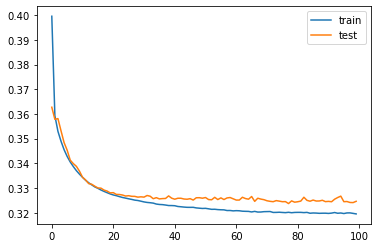

In [12]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2])

In [14]:
test_loss, test_accuracy = model.evaluate(test_X, test_y.to_numpy())

5489/5489 [==============================] - 3s 587us/step - loss: 0.3246 - accuracy: 0.8453


In [15]:
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 84.53%


In [16]:
y_pred = model.predict_classes(test_X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(test_y,y_pred)))

Precision score: 0.7725003685995324


              precision    recall  f1-score   support

           0       0.87      0.91      0.89    122586
           1       0.77      0.69      0.73     53039

    accuracy                           0.85    175625
   macro avg       0.82      0.80      0.81    175625
weighted avg       0.84      0.85      0.84    175625



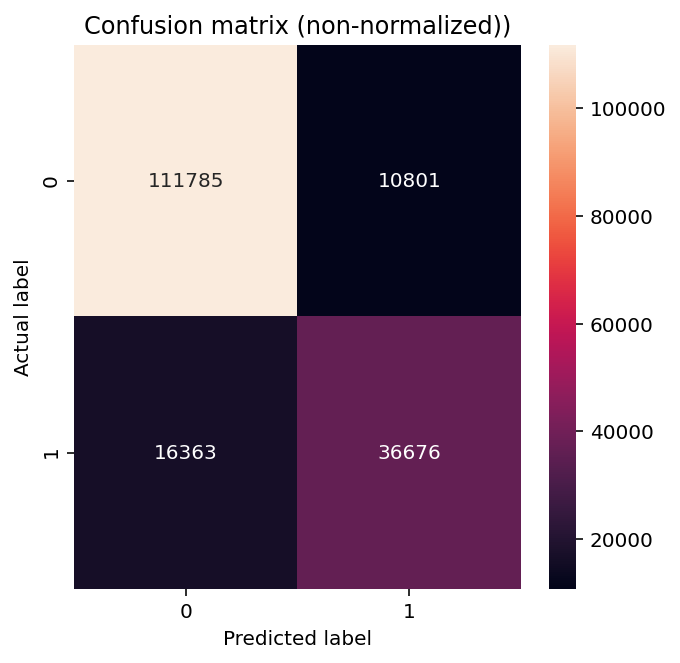

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
  
report = classification_report(test_y, y_pred)
print(report)
  
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix (non-normalized))")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
  
plot_cm(test_y, y_pred)

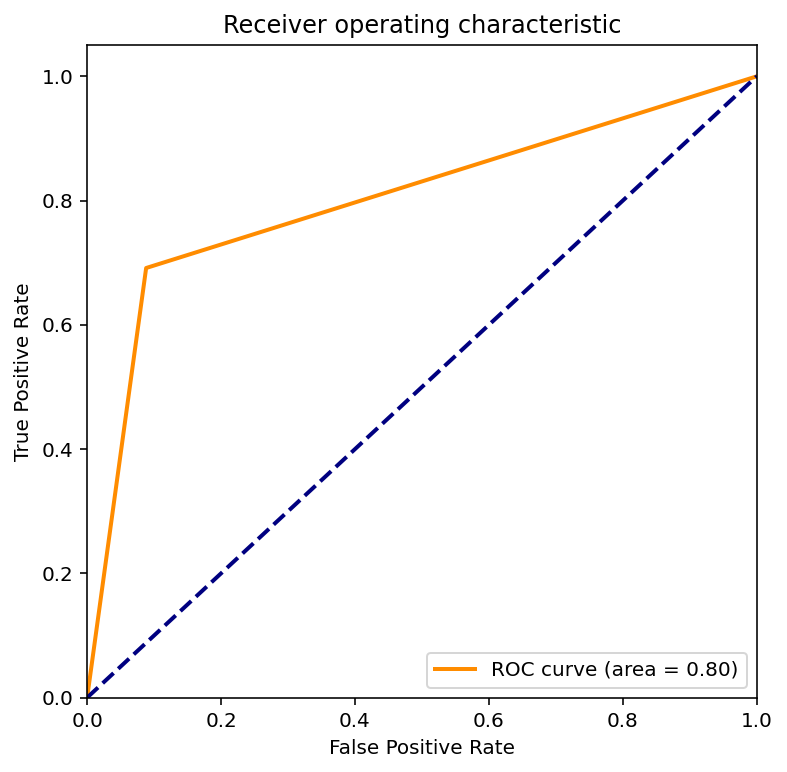

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
  
mpl.rcParams["figure.figsize"] = (6, 6)
  
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
  
# Binarize the output
y_bin = label_binarize(test_y, classes=[0, 1])
n_classes = 1
  
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in  range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y.ravel(), y_pred.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])
  
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()